# Question 6:
Write a **string_utilities** class that contains two methods:

* **is_valid_parenthese**: to validate a string of parentheses, '(', ')', '{', '}', '[' and ']. These brackets must be close in the correct order. For example   "()" and "()[]{}" are valid but "[)", "({[)]" and "{{{" are invalid.
* **reverse_words**: to reverse a string word by word.

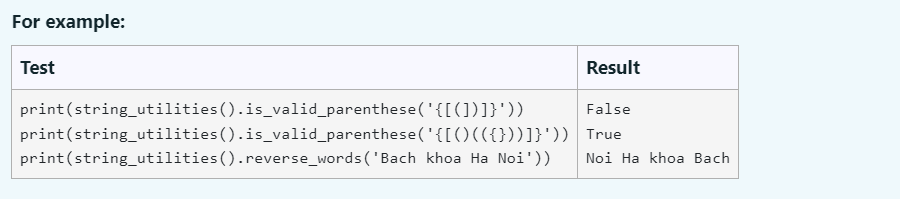

In [7]:
class string_utilities:
    def is_valid_parenthese(self,s: str) -> bool:
        stack = []
        for char in s:
            if char in '({[':
                stack.append(char)
            elif char in ')}]':
                if not stack:
                    return False
                top = stack.pop()
                if char == ')' and top != '(':
                    return False
                elif char == '}' and top != '{':
                    return False
                elif char == ']' and top != '[':
                    return False
        return not stack

    def reverse_words(self,temp:str):
        thelist=temp.split()
        thelist=thelist[::-1]
        return ' '.join(thelist)
    
print(string_utilities().is_valid_parenthese('{[(])]}'))
print(string_utilities().is_valid_parenthese('{[()(({}))]}'))
print(string_utilities().reverse_words('Bach khoa Ha Noi'))

False
True
Noi Ha khoa Bach


# Question 7:
Implement the **Matrix** class. It should contain:

* **Constructor** from a list of lists. It is guaranteed that the lists are composed of numbers, are not empty, and that they are all the same size. The constructor must copy the contents of the list of lists, i.e., when changing the lists from which the matrix was constructed, the contents of the matrix must not change.
* The **\_\_str\_\_** method, which translates a matrix into a string. In this case, elements within one line should be separated by tabs, and lines should be separated by line breaks. There should be no tab character after each line, and there should not be a line break at the end.
* The **size** method without arguments, returning a tuple of the form **(number of rows, number of columns)**.

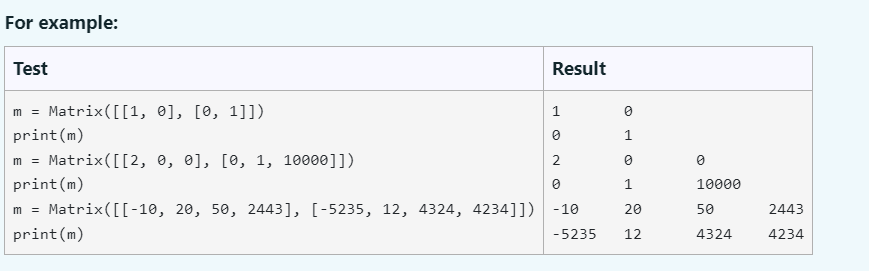

In [46]:

class Matrix:
    def __init__(self, matrix:list):
        self.matrix=matrix
        self.result=[[0 for j in range(len(self.matrix[0]))]for i in range(len(self.matrix))]
    def __str__(self) -> str:
        res=''
        for i in range(len(self.matrix)-1):
            res+='\t'.join(list(map(str,self.matrix[i])))+'\n'
        res+='\t'.join(list(map(str,self.matrix[-1])))
        return res
    def size(self):
        return len(self.matrix),len(self.matrix[0])
    def __add__(self,other):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]+other.matrix[i][j]
        return Matrix(self.result)
    def __mul__(self,num):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]*num
        return Matrix(self.result)
    def __rmul__(self,num):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]*num    
        return Matrix(self.result)
    def solve(self, b):
        n = len(self.matrix)
        M = [row[:] + [right] for row, right in zip(self.matrix, b)]

        for i in range(n):
            pivot_value = M[i][i]
            assert pivot_value != 0, 'Matrix is singular'
            M[i] = [x / pivot_value for x in M[i]]

            for j in range(n):
                if i == j:
                    continue
                ratio = M[j][i]
                M[j] = [x - ratio * y for x, y in zip(M[j], M[i])]

        x = [M[i][-1] for i in range(n)]
        return ' '.join(['{:.2f}'.format(i) for i in x])      
       


m = Matrix([[1, 0], [0, 1]])
print(m)
m = Matrix([[2, 0, 0], [0, 1, 10000]])
print(m)
m = Matrix([[-10, 20, 50, 2443], [-5235, 12, 4324, 4234]])
print(m)

1	0
0	1
2	0	0
0	1	10000
-10	20	50	2443
-5235	12	4324	4234


# Question 8:
Add the following methods to the previous class **Matrix**:

* **\_\_add\_\_**: takes a second matrix of the same size and returns the sum of the matrices.
* **\_\_mul\_\_**: takes an int or float and returns a matrix multiplied by a scalar.
* **\_\_rmul\_\_**: does the same thing as **\_\_mul\_\_**. This method will be called if the argument is on the right. To implement this method in the class code, it is enough to write **\_\_rmul\_\_** = **\_\_mul\_\_**.

**Explanation**:

In the following case, **\_\_mul\_\_** will be called: Matrix ([[0, 1], [1, 0]) * 10.

In the following case, **\_\_rmul\_\_** is called (since int has no **\_\_mul\_\_** defined for the matrix on the right): 10 * Matrix ([[0, 1], [1, 0]).

Of course, these methods should not change the contents of the matrix.

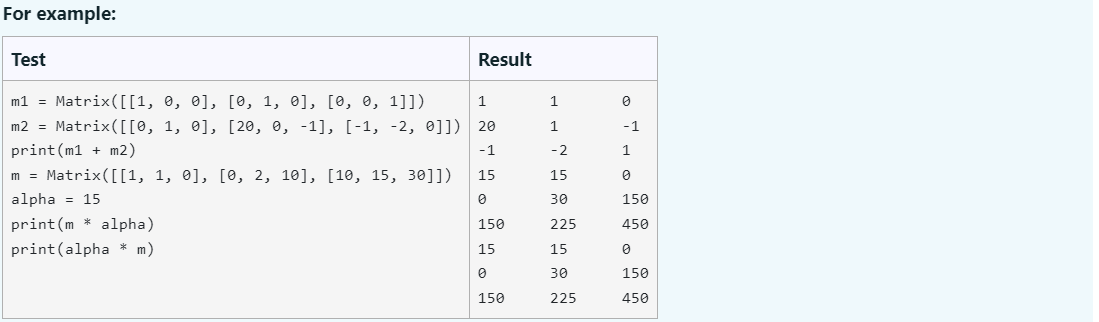

In [45]:
m1 = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
m2 = Matrix([[0, 1, 0], [20, 0, -1], [-1, -2, 0]])
print(m1 + m2)
m = Matrix([[1, 1, 0], [0, 2, 10], [10, 15, 30]])
alpha = 15
print(m * alpha)
print(alpha * m)

1	1	0
20	1	-1
-1	-2	1
15	15	0
0	30	150
150	225	450
15	15	0
0	30	150
150	225	450


# Question 9:
Let an instance **M** of the **Matrix** class is a square matrix that defines a system of linear algebraic equations: **Mx = b**

Your task is to add a **solve** method to the previous class **Matrix** that accepts a row vector **b** of free members and returns a string consisting of float numbers that represent the solution of the system of linear equations. The float numbers are separated by spaces and each number is displayed using **two digits** after the decimal points.

It is guaranteed that the system has always a unique solution.

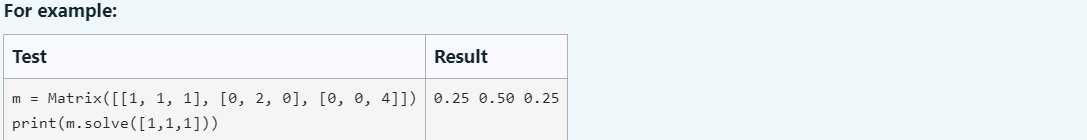

In [47]:
m = Matrix([[1, 1, 1], [0, 2, 0], [0, 0, 4]])
print(m.solve([1,1,1]))

0.25 0.50 0.25
